<a href="https://colab.research.google.com/github/Juanje932/Diplomado_IAJUAN/blob/Modulo-4/Clasificador_de_jitomates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa para clasificación en agricultura, Clasificador de jitomates

# Alumno:
Juan Jesus Fuentes Ramirez

Experimento para clasificar Base_Datos_Tomates.zip 25/07/2024

INICIO:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras

# imprimir la versión de tensorflow
print(tf.__version__)

2.15.0


In [3]:
import cv2
# imprimir la versión de tensorflow de OpenCv
print(cv2.__version__)

4.8.0


In [4]:
!cp /content/drive/MyDrive/Base_Datos_Tomates.zip ../

cp: cannot stat '/content/drive/MyDrive/Base_Datos_Tomates.zip': No such file or directory


In [5]:
import zipfile
import io

# se crea una carpeta en drive con el nombre: EXPERIMENTO_TALLER

Copiamos el contenido de (Base_Datos_Tomates.zip) a la carpeta EXPERIMENTO_TALLER_JITOMATE:

In [7]:
!unzip /content/drive/MyDrive/Base_Datos_Tomates.zip -d /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE

Archive:  /content/drive/MyDrive/Base_Datos_Tomates.zip
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (14).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (22).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (13).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (61).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (23).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (54).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (52).jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMAT

Importamos los datos, poniendo la dirección donde se encuentran, que en el caso de Colab es la dirección base_dir:

In [22]:
import os

base_dir = '/content/drive/MyDrive/EXPERIMENTO_TALLER_JITOMATE/Base_Datos_Tomates'

train_dir =      os.path.join(base_dir, 'Test')
validation_dir = os.path.join(base_dir, 'Train')
test_dir =       os.path.join(base_dir, 'Validation')

# Directorio con las imagenes de training
train_Verde_s_dir = os.path.join(train_dir, '1_Verde')
train_Quebrado_s_dir = os.path.join(train_dir, '2_Quebrado')
train_Rayado_s_dir = os.path.join(train_dir, '3_Rayado')
train_Naranja_s_dir = os.path.join(train_dir, '4_Naranja')
train_RojoNaranja_s_dir = os.path.join(train_dir, '5_RojoNaranja')
train_Rojo_s_dir = os.path.join(train_dir, '6_Rojo')

# Directorio con las imagenes de validation
validation_Verde_s_dir = os.path.join(validation_dir, '1_Verde')
validation_Quebrado_s_dir = os.path.join(validation_dir, '2_Quebrado')
validation_Rayado_s_dir = os.path.join(validation_dir, '3_Rayado')
validation_Naranja_s_dir = os.path.join(validation_dir, '4_Naranja')
validation_RojoNaranja_s_dir = os.path.join(validation_dir, '5_RojoNaranja')
validation_Rojo_s_dir = os.path.join(validation_dir, '6_Rojo')

# Directorio con las imagenes de test
test_Verde_s_dir = os.path.join(test_dir, '1_Verde')
test_Quebrado_s_dir = os.path.join(test_dir, '2_Quebrado')
test_Rayado_s_dir = os.path.join(test_dir, '3_Rayado')
test_Naranja_s_dir = os.path.join(test_dir, '4_Naranja')
test_RojoNaranja_s_dir = os.path.join(test_dir, '5_RojoNaranja')
test_Rojo_s_dir = os.path.join(test_dir, '6_Rojo')


Imprimo la cantidad de imágenes a utilizar:

In [23]:
print('total imagenes entrenamiento Verde :', len(os.listdir(train_Verde_s_dir) ))
print('total imagenes entrenamiento Quedbrado :', len(os.listdir(train_Quebrado_s_dir) ))
print('total imagenes entrenamiento Rayado :', len(os.listdir(train_Rayado_s_dir) ))
print('total imagenes entrenamiento Naranja :', len(os.listdir(train_Naranja_s_dir) ))
print('total imagenes entrenamiento RojoNaranja :', len(os.listdir(train_RojoNaranja_s_dir) ))
print('total imagenes entrenamiento Rojo :', len(os.listdir(train_Rojo_s_dir) ))

print('total imagenes validacion Verde :', len(os.listdir(validation_Verde_s_dir) ))
print('total imagenes validacion Quedbrado :', len(os.listdir(validation_Quebrado_s_dir) ))
print('total imagenes validacion Rayado :', len(os.listdir(validation_Rayado_s_dir) ))
print('total imagenes validacion Naranja :', len(os.listdir(validation_Naranja_s_dir) ))
print('total imagenes validacion RojoNaranja :', len(os.listdir(validation_RojoNaranja_s_dir) ))
print('total imagenes validacion Rojo :', len(os.listdir(validation_Rojo_s_dir) ))

print('total imagenes prueba Verde :', len(os.listdir(test_Verde_s_dir) ))
print('total imagenes prueba Quedbrado :', len(os.listdir(test_Quebrado_s_dir) ))
print('total imagenes prueba Rayado :', len(os.listdir(test_Rayado_s_dir) ))
print('total imagenes prueba Naranja :', len(os.listdir(test_Naranja_s_dir) ))
print('total imagenes prueba RojoNaranja :', len(os.listdir(test_RojoNaranja_s_dir) ))
print('total imagenes prueba Rojo :', len(os.listdir(test_Rojo_s_dir) ))



total imagenes entrenamiento Verde : 200
total imagenes entrenamiento Quedbrado : 200
total imagenes entrenamiento Rayado : 200
total imagenes entrenamiento Naranja : 200
total imagenes entrenamiento RojoNaranja : 200
total imagenes entrenamiento Rojo : 200
total imagenes validacion Verde : 400
total imagenes validacion Quedbrado : 400
total imagenes validacion Rayado : 400
total imagenes validacion Naranja : 400
total imagenes validacion RojoNaranja : 400
total imagenes validacion Rojo : 400
total imagenes prueba Verde : 100
total imagenes prueba Quedbrado : 100
total imagenes prueba Rayado : 100
total imagenes prueba Naranja : 100
total imagenes prueba RojoNaranja : 100
total imagenes prueba Rojo : 100


Acondicionamiento y normalización de las imágenes:

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=90,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=90,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=90,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256),
                                                         shuffle = False)


Found 1200 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


#Experimento
# Arquitectura VGG16 con Fine Tuning

In [25]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  #if layer.name == 'block5_conv1':
   # set_trainable = True
  #if layer.name == 'block5_conv2':
   # set_trainable = True
  if layer.name == 'block5_conv3':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [37]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(4096, activation='relu'))
modelFT.add(Dense(512, activation='relu'))
modelFT.add(Dense(6, activation='sigmoid'))


modelFT.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              134221824 
                                                                 
 dense_7 (Dense)             (None, 512)               2097664   
                                                                 
 dense_8 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 151037254 (576.16 MB)
Trainable params: 138682374 (529.03 MB)
Non-trainable params: 12354880 (47.13 MB)
_________________________________________________________________


In [38]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [39]:
batch_size = 90
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

13
26


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [41]:
checkpoint_VGG16_FT = ModelCheckpoint(filepath="pesos_VGG16_FT.weights.best.hdf5",save_best_only=True,verbose=1)

In [42]:
early_stop= EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,mode="min")

In [43]:
historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 50,
            validation_steps = validation_steps,
            verbose = 2,callbacks=[checkpoint_VGG16_FT,early_stop])

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.66867, saving model to pesos_VGG16_FT.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 - 40s - loss: 3.5154 - acc: 0.2739 - val_loss: 1.6687 - val_acc: 0.3624 - 40s/epoch - 3s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.66867 to 1.65060, saving model to pesos_VGG16_FT.weights.best.hdf5
13/13 - 37s - loss: 1.2882 - acc: 0.5090 - val_loss: 1.6506 - val_acc: 0.3081 - 37s/epoch - 3s/step
Epoch 3/50

Epoch 3: val_loss improved from 1.65060 to 1.46134, saving model to pesos_VGG16_FT.weights.best.hdf5
13/13 - 39s - loss: 1.0236 - acc: 0.5991 - val_loss: 1.4613 - val_acc: 0.4761 - 39s/epoch - 3s/step
Epoch 4/50

Epoch 4: val_loss improved from 1.46134 to 0.95194, saving model to pesos_VGG16_FT.weights.best.hdf5
13/13 - 47s - loss: 0.8064 - acc: 0.7108 - val_loss: 0.9519 - val_acc: 0.6026 - 47s/epoch - 4s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.95194
13/13 - 30s - loss: 0.6572 - acc: 0.7410 - val_loss: 1.0495 - val_acc: 0.5714 - 30s/epoch - 2s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.95194
13/13 - 30s - loss: 0.5193 - acc: 0.8099 - 

Cargamos los mejores pesos del entrenamiento:

In [47]:
modelFT.load_weights("/content/pesos_VGG16_FT.weights.best.hdf5")

In [48]:
import numpy as np

Realizamos la evaluación del Accuracy

In [49]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

7/7 [==============================] - 19s 3s/step - loss: 0.4045 - acc: 0.8950
Test Accuracy: 0.8949999809265137


Comparamos el entrenamiento y la validación del Accuracy(exactitud) y el loss (perdida)

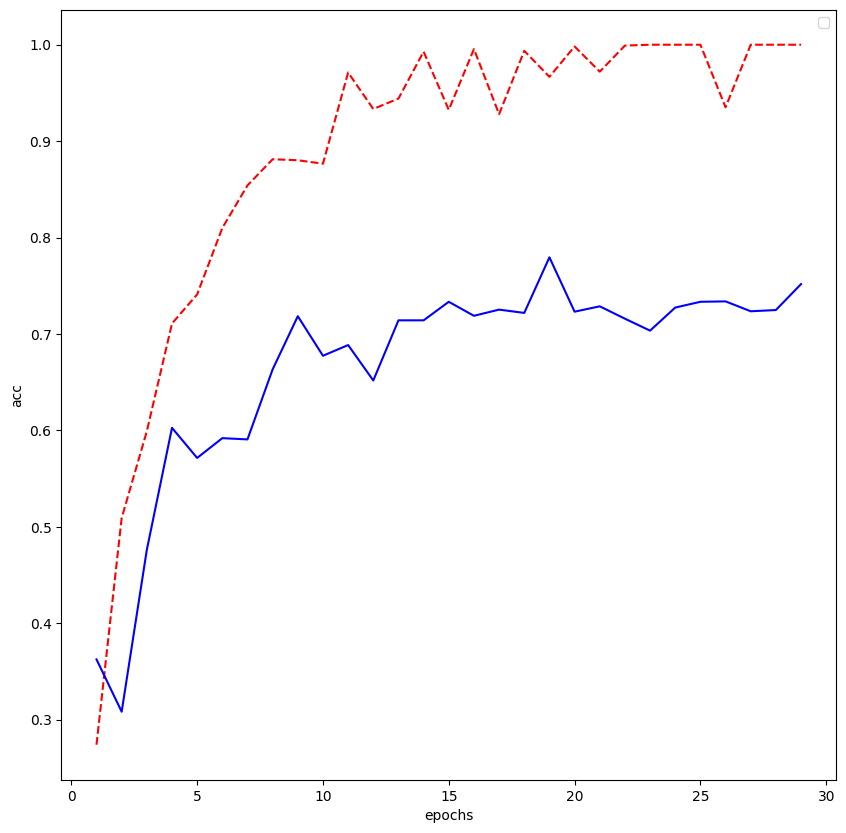

In [50]:
import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     acc, 'r--', label=''  )
ax.plot  ( epochs, val_acc,  'b', label='')
ax.set_title ("")
ax.set_ylabel('acc')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Accuracy VGG16_FT.png")
f.savefig("Training and Validation Accuracy VGG16_FT.eps")

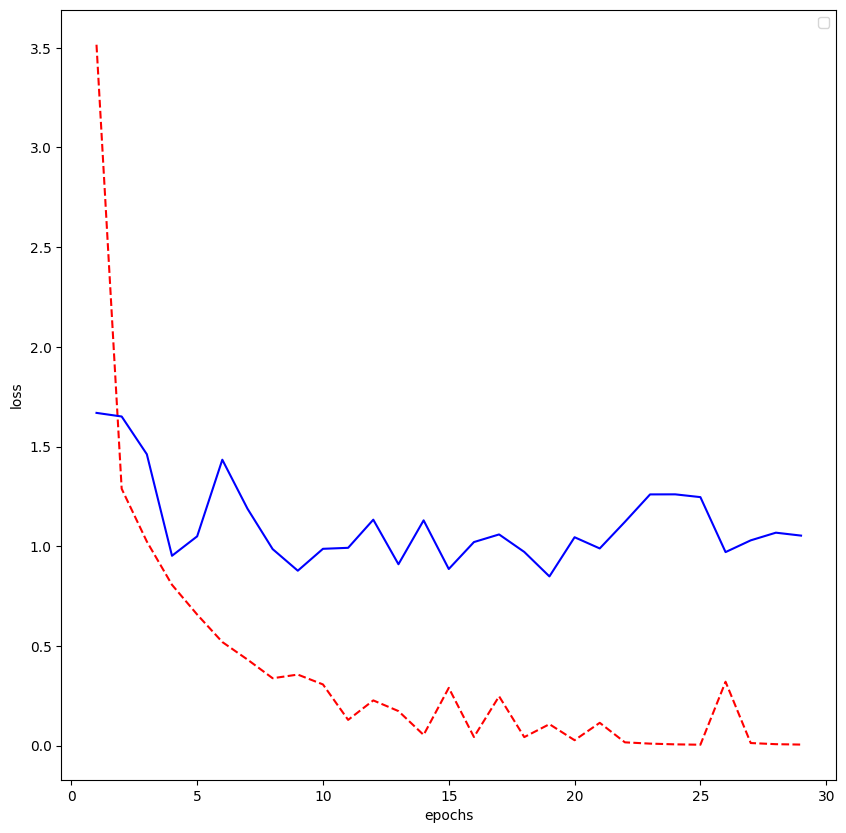

In [51]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     loss, 'r--', label=''  )
ax.plot  ( epochs, val_loss ,  'b', label='' )
ax.set_title ("")
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Loss VGG16_FT.png")
f.savefig("Training and Validation Loss VGG16_FT.eps")

# Matriz de Confusión

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [53]:
import numpy as np
import seaborn as sns

In [54]:
# Funcion que permite graficar las matrices de confusion
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

7/7 [==============================] - 6s 603ms/step


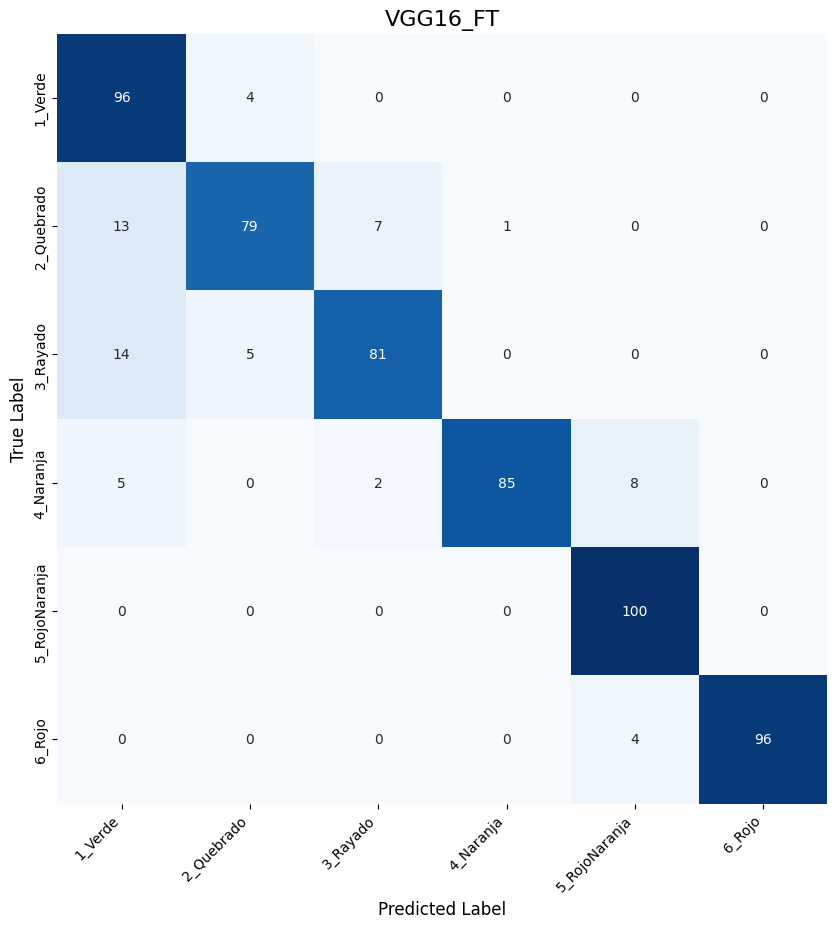

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_heatmap(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), test_generator.class_indices.keys() , ax, title="VGG16_FT")
fig.savefig("VGG16_FT matrix_confusion.png")
fig.savefig("VGG16_FT matrix_confusion.eps")

# Métricas de desempeño del clasificador

In [56]:
print(classification_report(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), target_names=test_generator.class_indices ))

7/7 [==============================] - 5s 657ms/step
               precision    recall  f1-score   support

      1_Verde       0.75      0.96      0.84       100
   2_Quebrado       0.90      0.79      0.84       100
     3_Rayado       0.90      0.81      0.85       100
    4_Naranja       0.99      0.85      0.91       100
5_RojoNaranja       0.89      1.00      0.94       100
       6_Rojo       1.00      0.96      0.98       100

     accuracy                           0.90       600
    macro avg       0.90      0.90      0.90       600
 weighted avg       0.90      0.90      0.90       600



Guardamos el History

In [57]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
#history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(historyFT.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)